# Download the Data

In [56]:
medical_charges_url= 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [57]:
from urllib.request import urlretrieve

In [58]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x20749f37940>)

In [59]:
import pandas as pd

In [60]:
med_df= pd.read_csv('medical.csv')

In [61]:
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [62]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis and Vizualization

In [64]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']= 14
matplotlib.rcParams['figure.figsize']= (10, 6)
matplotlib.rcParams['figure.facecolor']= '#00000000'

### Age

In [66]:
med_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [67]:
fig = px.histogram(med_df,
                   x= 'age',
                   marginal= 'box',
                   nbins= 47,
                   title= "Distribution of Age")
fig.update_layout(bargap= 0.1)
fig.show()

### Body Mass Index

In [68]:
med_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [69]:
fig = px.histogram(med_df,
                   x= 'bmi',
                   marginal= 'box',
                   color_discrete_sequence= ['red'],
                   title= 'Distribution of BMI')
fig.update_layout(bargap= 0.1)
fig.show()

### Annual Medical Charges

In [70]:
med_df.smoker.describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [71]:
fig = px.histogram(med_df,
                   x= 'charges',
                   marginal= 'box',
                   color= 'smoker',
                   color_discrete_sequence= ['green', 'gray'],
                   title= 'Annual Medical Charges')
fig.update_layout(bargap= 0.1)
fig.show()

In [72]:
med_df.sex.describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [73]:
fig = px.histogram(med_df,
                   x= 'charges',
                   marginal= 'box',
                   color= 'sex',
                   color_discrete_sequence= ['pink', 'lightblue'],
                   title= 'Annual Medical Charges')
fig.update_layout(bargap= 0.1)
fig.show()

In [74]:
med_df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [75]:
fig = px.histogram(med_df,
                   x= 'charges',
                   marginal= 'box',
                   color= 'region',
                   color_discrete_sequence= ['blue', 'green', 'red', 'gray'],
                   title= 'Annual Medical Charges')
fig.update_layout(bargap= 0.1)
fig.show()

### Smoker

In [76]:
med_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [77]:
px.histogram(med_df, x='smoker', color='sex', title='Smoker')

## Age and Charges

In [78]:
fig = px.scatter(med_df,
                 x= 'age',
                 y= 'charges',
                 color='smoker',
                 opacity= 0.8,
                 hover_data=['sex'],
                 title= 'Age vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

## BMI and Charges

In [79]:
fig = px.scatter(med_df,
                 x= 'bmi',
                 y= 'charges',
                 color='smoker',
                 opacity= 0.8,
                 hover_data=['sex'],
                 title= 'BMI vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

# Correlation

In [80]:
med_df.charges.corr(med_df.age)

np.float64(0.2990081933306478)

In [81]:
med_df.charges.corr(med_df.bmi)

np.float64(0.19834096883362887)

In [82]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = med_df.smoker.map(smoker_values)
med_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

# Linear Regression using a single feature

In [83]:
non_smoker = med_df[med_df.smoker == 'no']

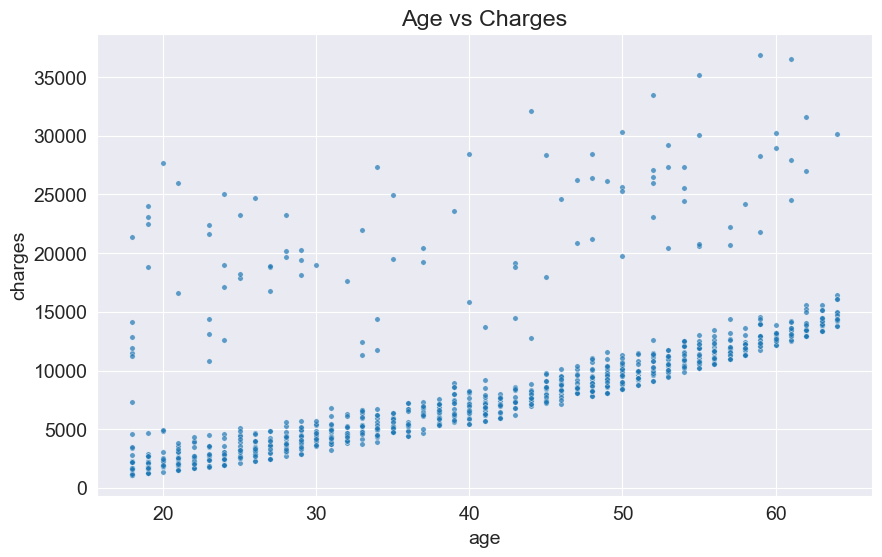

In [84]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smoker, x='age', y='charges', alpha= 0.7, s= 15);

In [85]:
def estimate_charges(age, w, b):
    return w * age + b

In [90]:
def try_parameters(w, b):
    ages = non_smoker.age
    target = non_smoker.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha= 0.9)
    plt.scatter(ages, target, s=8 , alpha= 0.8)
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

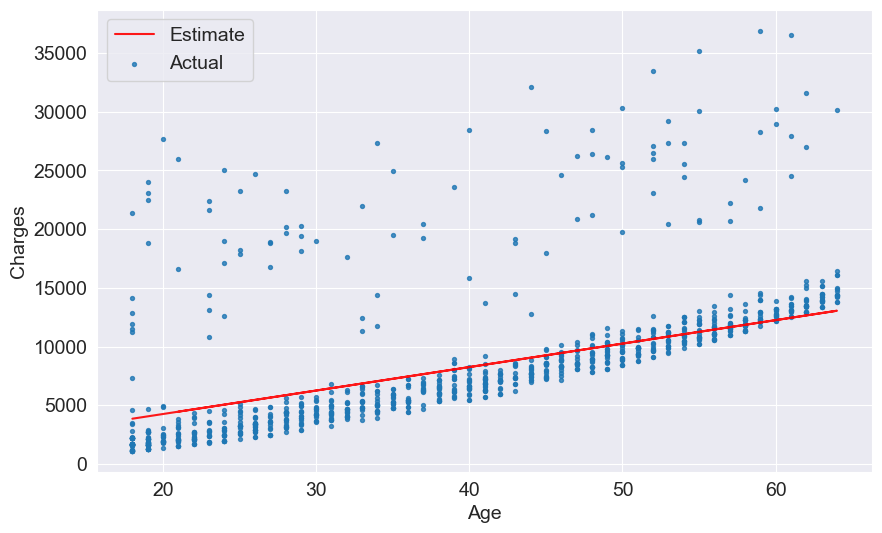

In [152]:
try_parameters(200, 250)

### Loss/Cost Function

In [146]:
import numpy as np

In [147]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [155]:
w= 200
b =250

In [159]:
targets = non_smoker['charges']
predicted = estimate_charges(non_smoker.age, w, b)

In [160]:
rmse(targets, predicted)

np.float64(4767.544051805388)

In [161]:
def try_parameters(w, b):
    ages = non_smoker.age
    target = non_smoker.charges
    
    predictions = estimate_charges(ages, w, b)
    
    plt.plot(ages, predictions, 'r', alpha= 0.9)
    plt.scatter(ages, target, s=8 , alpha= 0.8)
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4767.544051805388


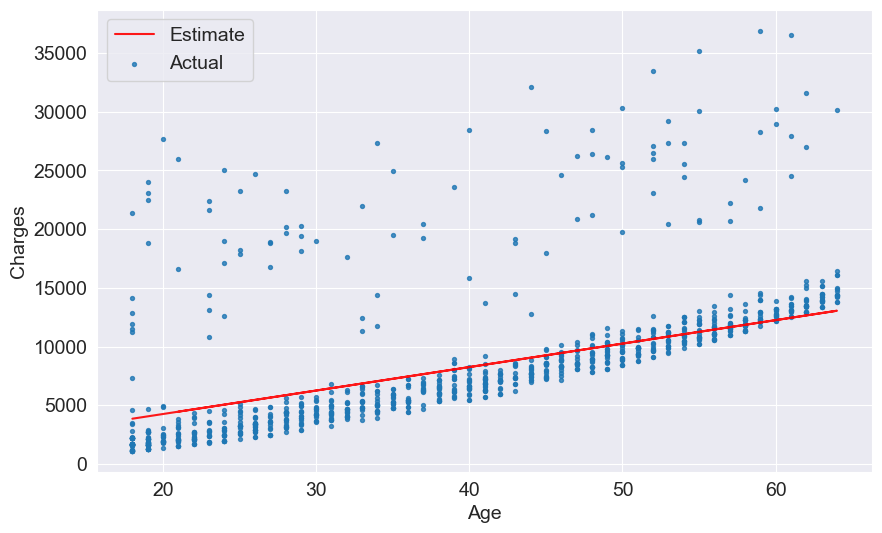

In [162]:
try_parameters(200, 250)

### Linear regression using Scikit-Learn

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
model = LinearRegression()

In [165]:
inputs = non_smoker[['age']]
targets = non_smoker.charges
print("inputs shape: ", inputs.shape)
print("targets shape: ", targets.shape)

inputs shape:  (1064, 1)
targets shape:  (1064,)


In [167]:
model.fit(inputs, targets)

LinearRegression()

In [168]:
model.predict([[21],
               [36],
               [54]])

C:\Work\MachLearnPro\mlp\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 3520.80661289,  7529.54030536, 12340.02073632])

In [169]:
predictions = model.predict(inputs)

In [170]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [171]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [172]:
model.coef_

array([267.24891283])

In [173]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.505766636395


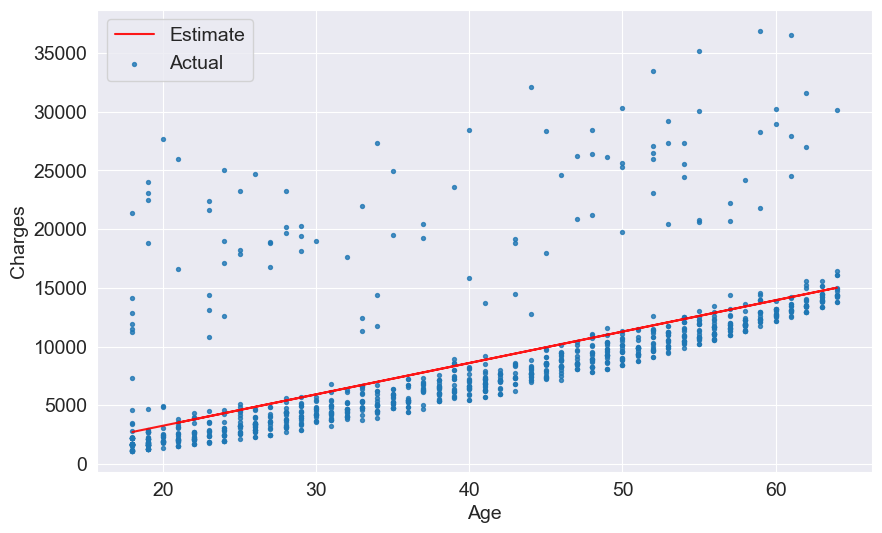

In [174]:
try_parameters(model.coef_, model.intercept_)